In [1]:
%load_ext rpy2.ipython

---
title: "Reproducible Research: Peer Assessment 1"
author: "Pedro Ramon Almeida Oiticica"
date: "30 de outubro de 2018"
output: 
html_document:
keep_md: true
jupyter:
  jupytext:
    text_representation:
      extension: .Rmd
      format_name: rmarkdown
      format_version: '1.0'
      jupytext_version: 0.8.4
  kernelspec:
    display_name: R
    language: R
    name: ir
  language_info:
    codemirror_mode: r
    file_extension: .r
    mimetype: text/x-r-source
    name: R
    pygments_lexer: r
    version: 3.4.3
---

In [2]:
knitr::opts_chunk$set(echo = TRUE, message = FALSE,warning = FALSE)

SyntaxError: invalid syntax (<ipython-input-2-e196e90425f2>, line 1)

## Introduction

It is now possible to collect a large amount of data about personal movement using activity monitoring devices such as a [Fitbit](http://www.fitbit.com/), [Nike Fuelband](http://www.nike.com/us/en_us/c/nikeplus-fuelband), or [Jawbone Up](https://jawbone.com/up). These type of devices are part of the "quantified self" movement - a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. But these data remain under-utilized both because the raw data are hard to obtain and there is a lack of statistical methods and software for processing and interpreting the data.

This assignment makes use of data from a personal activity monitoring device. This device collects data at 5 minute intervals through out the day. The data consists of two months of data from an anonymous individual collected during the months of October and November, 2012 and include the number of steps taken in 5 minute intervals each day.

The data for this assignment can be downloaded from the web site:

Dataset: [Activity monitoring data (52K)](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip)

The variables included in this dataset are:

- steps: Number of steps taking in a 5-minute interval (missing values are coded as \color{red}{\verb|NA|}NA)
- date: The date on which the measurement was taken in YYYY-MM-DD format
- interval: Identifier for the 5-minute interval in which measurement was taken

The dataset is stored in a comma-separated-value (CSV) file and there are a total of 17,568 observations in this dataset.


## Loading and preprocessing the data

1. Load the data.
2. Process/transform the data into a suitable format.

If you already forked and cloned the directoty from my github repository, the raw data file "activity.zip" is already included. Then it's not necessary to download it from the above link.


**1. This code will unzip and load the data from the local zip file into RStudio.**

In [3]:
%%R
activity<-read.csv(unz("activity.zip", "activity.csv"),stringsAsFactors = FALSE)

**2. Process/transform the data into a suitable format.**

In the introduction we give informations about the raw dataset. The variables included in this data set are:

- steps: Number of steps in a 5-minute interval (missing values are coded as NA)
- date: The date in which  the measurement was taken in "YYYY-MM-DD" format.
- interval: Identifier for the 5-minute in which measure was taken (int: HHMM:{0,5,10,15,...55,100,105,...,155,200,205,...,2355}).

We can see a summary of the raw dataset using the code

In [19]:
%%R
str(activity)

we use the following code to process the raw data into a more suitable format.

In [5]:
%%R
# Convert the column date from a string type (chr) to a date format object.
# Parse the interval values into a 4-digit HHMM, and into a date-time format (type "Period") using the functions FormatC(), sub() and the lubridate package. Its necessary to convert the class "period" (PISIXlt) into a POSIXct format using as_datetime() function because dplyr package do not work propelly with the class "Period" format in the filter, arrange,... functions.
library(dplyr)
library(lubridate)
act<-activity%>%mutate(date=as.Date(date))%>%mutate(time=formatC(interval,width=4,flag="0"))%>%mutate(time=sub("([[:digit:]]{2,2})$", ":\\1",time))%>%mutate(time=hm(time))%>%mutate(time=as_datetime(time))

Let's take a look in out processed data set act.

In [18]:
%%R
head(act)
str(act)

_______________________________________________________________________


## What is mean total number of steps taken per day?

1. Calculate the total number of steps taken per day
2. Make a histogram of the total number of steps taken each day (If you do not understand the difference between a histogram and a barplot, research the difference between them).
3. Calculate and report the mean and median of the total number of steps taken per day

In [7]:
%%R
stepsday<-act%>%group_by(date)%>%summarize(steps=sum(steps))

Plot a histogram.

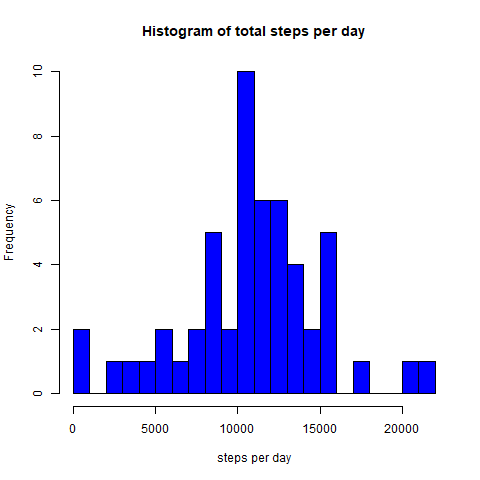

In [8]:
%%R
hist(stepsday$steps, breaks=20,
     main="Histogram of total steps per day",
     xlab="steps per day", col="blue")

Calculate the mean and median

In [9]:
%%R
meansteps = mean(stepsday$steps,na.rm=TRUE)
mediansteps = median(stepsday$steps,na.rm=TRUE)

#### The *mean* and *median* total number of steps taken per day are: 

**mean** = **`r meansteps`**  
**median** = **`r mediansteps`**

________________________________________________________________________________


## What is the average daily activity pattern?

The average daily activity pattern shows the mean value of steps counted for each time interval along the measured days. It can give information of what are the moste active time of the day and the lowest active time of the day on average. To plot this pattern we use the following code.

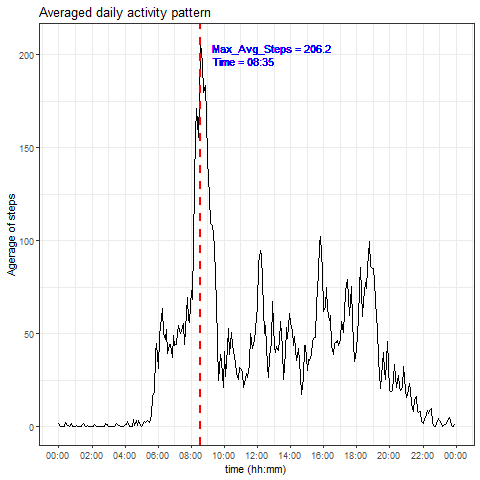

In [10]:
%%R
library(ggplot2)
library(scales)
library(stringr)

#Obtain the activity pattern by the average of the number of steps per #time-interval.
actpattern<-act%>%group_by(interval)%>%
        summarize(meansteps=mean(steps,na.rm=TRUE))%>%mutate(time=formatC(interval,width=4,flag="0"))%>%mutate(time=sub("([[:digit:]]{2,2})$",":\\1",time))%>%mutate(time=hm(time))%>%mutate(time=as_datetime(time))

#Calculate the most active time and the average number of steps that corresponsd to it.
MaxAvgSteps=max(actpattern$meansteps)
MostActiveTime<-with(actpattern,time[which(meansteps==MaxAvgSteps)])

#plot the activity pattern
ggplot(data=actpattern,aes(x=time,y=meansteps))+geom_line()+
        scale_x_datetime(breaks=date_breaks("120 mins"),
                         labels=date_format("%H:%M"))+
        theme_bw()+
        labs(title="Averaged daily activity pattern")+
        labs(x="time (hh:mm)")+
        labs(y="Agerage of steps")+
        geom_vline(xintercept = MostActiveTime,col="red",lty=2,lwd=1)+
        geom_text(aes(x=MostActiveTime,y=MaxAvgSteps),
                  label=str_c("Max_Avg_Steps = ",formatC(MaxAvgSteps,digits=4)),
                  colour="blue", angle=0,vjust=1.0,hjust=-0.1)+
        geom_text(aes(x=MostActiveTime,y=MaxAvgSteps),
                  label=str_c("Time = ", format(MostActiveTime,"%H:%M")),
                  colour="blue",angle=0,vjust = 2.5,hjust=-0.2)

The maximum number of steps averaged across all the days in the dataset is centered at the time `r format(MostActiveTime,"%H:%M")`. The maximum of the activity occurs between 8:00 ans 9:00 hours.


## Imputing missing values

Note that there are a number of days/intervals where there are missing values (coded as <span style="color:red">NA</span>). The presence of missing days may introduce bias into some calculations or summaries of the data.

Here we perform some exploratory analysis and propose a method to overcome the absense of data in some rows of our original data. We wil do the following.

1. Calculate and report the total number of missing values in the dataset (i.e the total number of rows with NAs)
2. Devise a strategy for filling in all the missing values in the data. 
3. Create a new dataset that is equal to the original but with the missing data filled in.
4. Make a histogram of the total number of steps taken per day.
5. Compare the new exploratoy analyse results obtained and the histogram obtained with that obtainet in the first part of this assignment. We also discuss the impact of imputing data on the estimates of the total daily number of steps.

Let's check the missing values NAs in our data set.

In [11]:
%%R
summarize_all(act,funs(sum(is.na(.))))

We can devise a strategy for filling in all of the missing values in the dataset. when we what to create a methode or strategy to atribute values, we first try to find some pattern in the dataset that can me used as an indicator or to rule a matematical and statiscital modeling.


Let's beguin by list the dates for whitch steps are NAs.

In [12]:
%%R
nadates<-act%>%filter(is.na(steps))%>%mutate(weekday=weekdays(date))%>%select(date,weekday)%>%unique()%>%print()


The above table shows the dates and the corresponding weekdays for which the steps aren't measured. We can't see any pattern of weekdays in the above table. To fill in the missing values on the column steps for these dates, we can use the average values of the steps for each time interval that we previously obtained and showed in the above graph of daily activity pattern. We consider here that the steps pattern do not change considerably with the weekday.

We use the folowing code to fill in the missing values in the column steps of our dataset.

In [13]:
%%R
# Divide the data set in two parts with and without NAs values.
notNAact<-act%>%filter(!is.na(steps))

naact<-act%>%filter(is.na(steps))

# Create a collumn with the averaged values in the propelly orther to be atributed for the NAs values according to our filling in method.

index<-match(naact$interval,actpattern$interval)
fillNAStepCol<-actpattern$meansteps[index]

# Filling the NA values.
naact<-naact%>%mutate(fillvalues=fillNAStepCol)
filledact<-naact%>%mutate(steps=fillvalues)%>%select(.,-fillvalues)

# Merge the two datasets
act2<-arrange(rbind(filledact,notNAact),date,time)


we created a new dataset called act2 using our method of filling in missing values on the variable steps. This dataset is equal to the original but with the missing data filled in. To check if our method is reasonable let's plot a histogram of the total steps taken per day on the filled in dataset and compare the result with the histogram obtained with the original data.

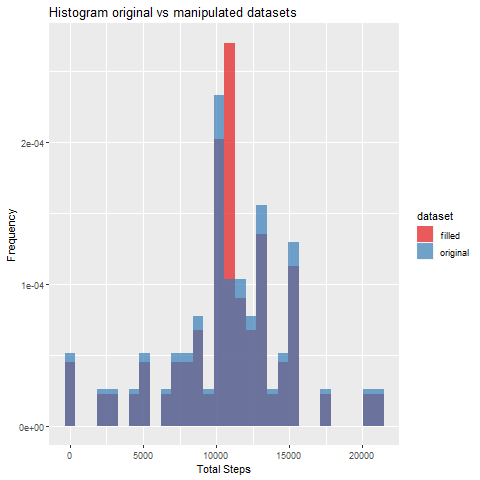

In [14]:
%%R
require(dplyr)
require(ggplot2)

# Calculate the total number of steps taken per day
stepsday2<-act2%>%group_by(date)%>%summarize(steps=sum(steps))%>%mutate(dataset="filled")
stepsday1<-stepsday%>%mutate(dataset="original")

stepsday3<-arrange(rbind(stepsday1,stepsday2),date)

ggplot(stepsday3, aes(steps, fill = dataset)) + geom_histogram(alpha =0.7, aes(y = ..density..), position = 'identity')+ scale_fill_brewer(palette = "Set1")+
        labs(title="Histogram original vs manipulated datasets")+
        labs(x="Total Steps")+
        labs(y="Frequency")


We calculate and report the mean and median of the total number of steps taken per day.

In [15]:
%%R
meansteps2 = mean(stepsday2$steps,na.rm=TRUE)
mediansteps2 = median(stepsday2$steps,na.rm=TRUE)

The *mean* and *median* total number of steps taken per day are compared here: 

For the original dataser we have **mean** = **`r meansteps`**, and **median** = **`r mediansteps`**.

For the filled in dataset we have **mean2** = **`r meansteps2`**, and **median2** = **`r mediansteps2`**.

With these results, we can conclude that our method for filling the absent values in the column steps is reasonable, because the change in the statistical distribution is not significant. The frequency of the mean value increases because we atrubuted for the missing value days the average value os steps.



## Are there differences in activity patterns between weekdays and weekends?

1. Create a new factor variable in the dataset with two levels - "weekday"
and "weekend" indicating whether a given date is a weekday or weekend
day.

In [16]:
%%R
act<-act%>%mutate(day=weekdays(date))%>%mutate(type=ifelse(day=="s?bado" | day=="domingo","weekend","weekday"))

act2<-act2%>%mutate(day=weekdays(date))%>%mutate(type=ifelse(day=="s?bado" | day=="domingo","weekend","weekday"))

2. Make a panel plot containing a time series plot (i.e. type = "l") of the
5-minute interval (x-axis) and the average number of steps taken, averaged
across all weekday days or weekend days (y-axis).

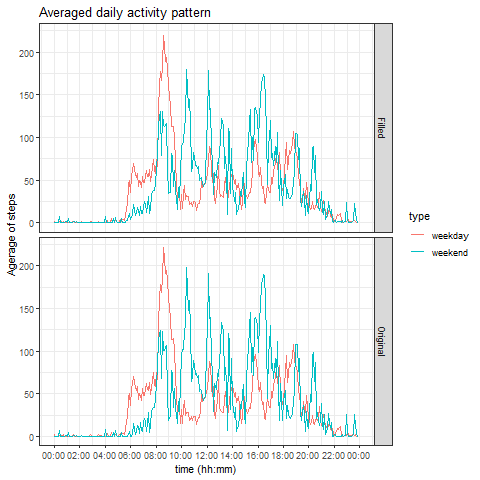

In [17]:
%%R
#Obtain the activity pattern by the average of the number of steps for each
#time-interval for the two datasets and for the two types of days, weekdays
#and weekends.

require(lubridate)

actpattern1<-act%>%group_by(type, interval)%>%summarize(meansteps=mean(steps,na.rm=TRUE))%>%ungroup()%>%mutate(time=formatC(interval,width=4,flag="0"))%>%mutate(time=sub("([[:digit:]]{2,2})$",":\\1",time))%>%mutate(time=hm(time))%>%mutate(time=as_datetime(time))%>%mutate(dataset="Original")


actpattern2<-act2%>%group_by(type,interval)%>%summarize(meansteps=mean(steps,na.rm=TRUE))%>%ungroup()%>%mutate(time=formatC(interval,width=4,flag="0"))%>%mutate(time=sub("([[:digit:]]{2,2})$",":\\1",time))%>%mutate(time=hm(time))%>%mutate(time=as_datetime(time))%>%mutate(dataset="Filled")

actpattern3<-rbind(actpattern1,actpattern2)


#Calculate the most active time and the average number of steps that corresponsd to it.
MaxAvgSteps=max(actpattern1$meansteps)
MostActiveTime<-with(actpattern1,time[which(meansteps==MaxAvgSteps)])

#plot the activity pattern
myplot<-ggplot(data=actpattern3,aes(x=time,y=meansteps, colour=type))+geom_line()+ facet_grid(dataset ~ .)+
        scale_x_datetime(breaks=date_breaks("120 mins"),
                         labels=date_format("%H:%M"))+
        theme_bw()+
        labs(title="Averaged daily activity pattern")+
        labs(x="time (hh:mm)")+
        labs(y="Agerage of steps")
        

plot(myplot)


The diffference beteew the original and filled data set is barely perceptible. Alltough there are a significant difference pattern on the steps for weekday ans weekends. The differences can be explained by the activities that are, on avarege different. During the weekdays the person wake up earlyer and do not walk so much in the afternoon, maybe his/her job is on an office. O weekends the person wake up later and walks more at afternoon, maybe he/she enjoy the weekend with sport activies.